In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

RESULT_DIR = 'experiments/'

In [2]:
def get_losses_experiment(experiment_directory):
    experiment_name = experiment_directory.split('/')[1:]
    experiment_name = '/'.join(experiment_name)
    
    with open(experiment_directory + '/log_train&test.txt', 'r') as f:
        doc = f.read()
    
    train_losses = []
    test_lossses =[]
    epochs = []
    for line in doc.split('\n')[:-1]:
        # ignore last item cause it is an empty line
        line_dict = json.loads(line)
        
        train_losses.append(line_dict['train_loss'])
        test_lossses.append(line_dict['test_loss'])
        epochs.append(line_dict['epoch'])

    df = pd.DataFrame(
        data = np.column_stack([train_losses, test_lossses]),
        index = epochs,
        columns = [[experiment_name, experiment_name], ['train_loss', 'test_loss']]

    )
    df.index.name = 'epochs'
    return df

# get_losses_experiment('experiments/enc_layers_2_dec_layers_4/')

def get_all_OadTR_losses(result_dir):
    loss_dfs = []
    max_epochs = 0
    for subdir, _, _ in os.walk(result_dir):
        if not 'log_train&test.txt' in os.listdir(subdir):
            continue
        else:
            curr_df = get_losses_experiment(subdir)
            loss_dfs.append(curr_df)
            
            # get max epochs, so df_s can be padded accordingly
            if len(curr_df) > max_epochs:
                max_epochs = len(curr_df)
            
    out_df = pd.concat(loss_dfs, axis=1, join='outer')
    return out_df
    

out_df = get_all_OadTR_losses(RESULT_DIR)

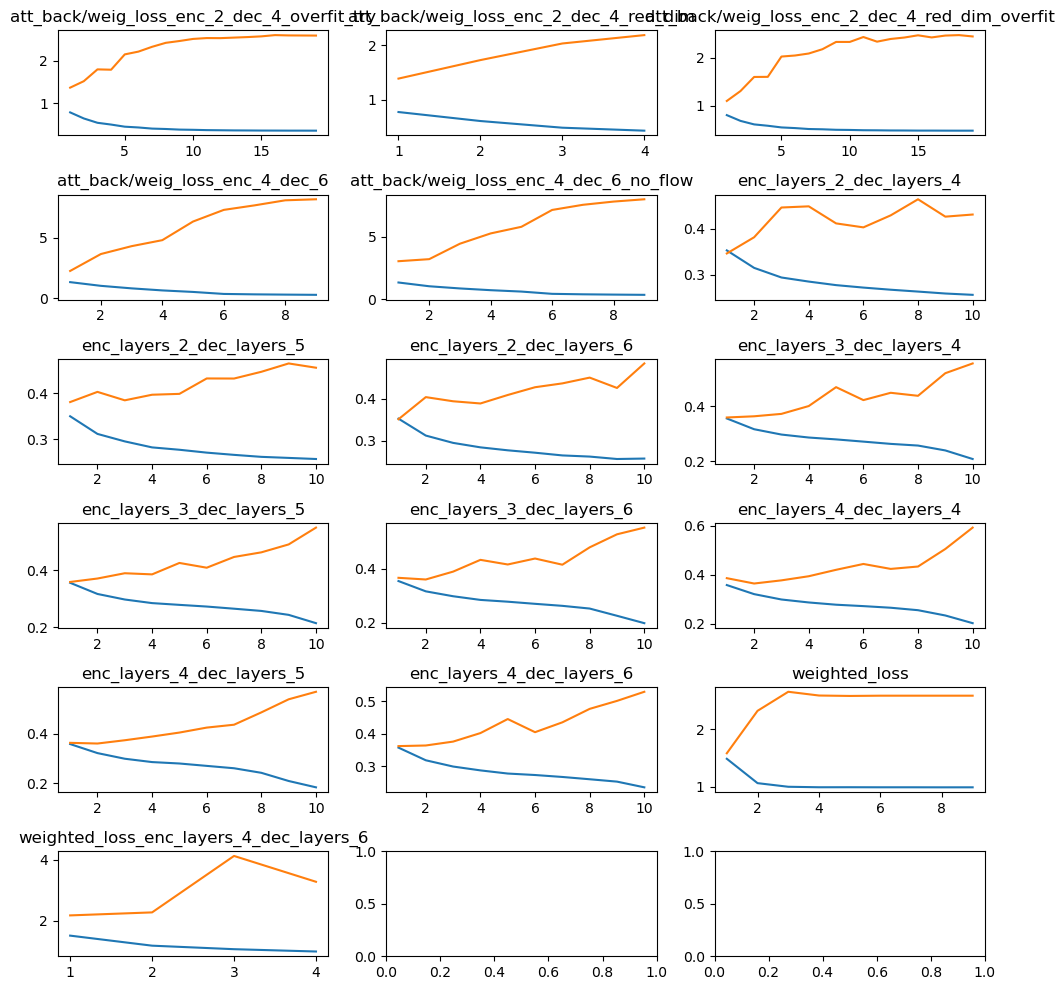

In [3]:
def visualize_losses(loss_df):
    # get number of high level column names
    high_level_columns = np.unique(sorted(loss_df.columns.get_level_values(0)))
    
    # at most 4 plots per row, 
    n_rows = int(np.ceil(len(high_level_columns) / 3))
    n_cols = 3
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(10,10))

    for i, column in enumerate(high_level_columns):
        df_sub = loss_df.loc[:,column]
        sub_col = i % 3
        sub_row = (i // 3)
        ax[sub_row, sub_col].plot(df_sub)
        ax[sub_row, sub_col].set_title(column)

    plt.tight_layout()
    
visualize_losses(out_df)


In [4]:
out_df[[i for i in out_df.columns if 'test_loss' in i]].min().idxmin()

('enc_layers_2_dec_layers_4', 'test_loss')

In [5]:
1e-3 * 0.5 * 0.5 * 0.5

0.000125

In [6]:
5e-4

0.0005

In [7]:
init = np.zeros(4)
for i in range(3):
    init += np.ones(4)
print(init)

[3. 3. 3. 3.]


In [8]:
np.array([4 for i in [1,2,3,4]]) / (np.ones(4) + np.ones(4))

array([2., 2., 2., 2.])